# Load the Data

In [1]:
import pandas as pd
import zipfile
import os

# Function to load CSV from a ZIP file with multiple files
def load_csv_from_zip(zip_path, csv_filename):
    with zipfile.ZipFile(zip_path, 'r') as z:
        # Extract and read the specific CSV file
        with z.open(csv_filename) as f:
            return pd.read_csv(f)

# Define the relative path to the datasets folder
datasets_path = os.path.join('..', 'Datasets')

# Load datasets from zipped CSV files specifying the correct CSV filenames
df_gb = load_csv_from_zip(os.path.join(datasets_path, 'GBvideos.csv.zip'), 'GBvideos.csv')
df_us = load_csv_from_zip(os.path.join(datasets_path, 'USvideos.csv.zip'), 'USvideos.csv')

# Add a new column 'location' in each data file
df_gb['location'] = 'Great Britain'
df_us['location'] = 'USA'

# Merge 5 files into 1
merged_df = pd.concat([df_gb, df_us], ignore_index=True)

# Check the first few rows of the merged DataFrame
print(merged_df.head())

      video_id trending_date  \
0  Jw1Y-zhQURU      17.14.11   
1  3s1rvMFUweQ      17.14.11   
2  n1WpP7iowLc      17.14.11   
3  PUTEiSjKwJU      17.14.11   
4  rHwDegptbI4      17.14.11   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id              publish_time  \
0                  John Lewis           26  2017-11-10T07:38:29.000Z   
1         Saturday Night Live           24  2017-11-12T06:24:44.000Z   
2                  EminemVEVO           10  2017-11-10T17:00:03.000Z   
3  Salford City Football Club           17  2017-11-13T02:30:38.000Z   
4            Cute Girl Videos           25  2017-11-13T01:45:13.000Z   

                                     

# Check Missing Values

In [2]:
# Check for missing values in the merged DataFrame
print("Missing values")
print(merged_df.isnull().sum())

Missing values
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1182
location                     0
dtype: int64


In [3]:
df = merged_df.dropna()

In [4]:
# Check for missing values in the merged DataFrame
print("Missing values")
print(df.isnull().sum())

Missing values
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
location                  0
dtype: int64


# Exploratory Data Analysis (EDA)

# Check Outliers

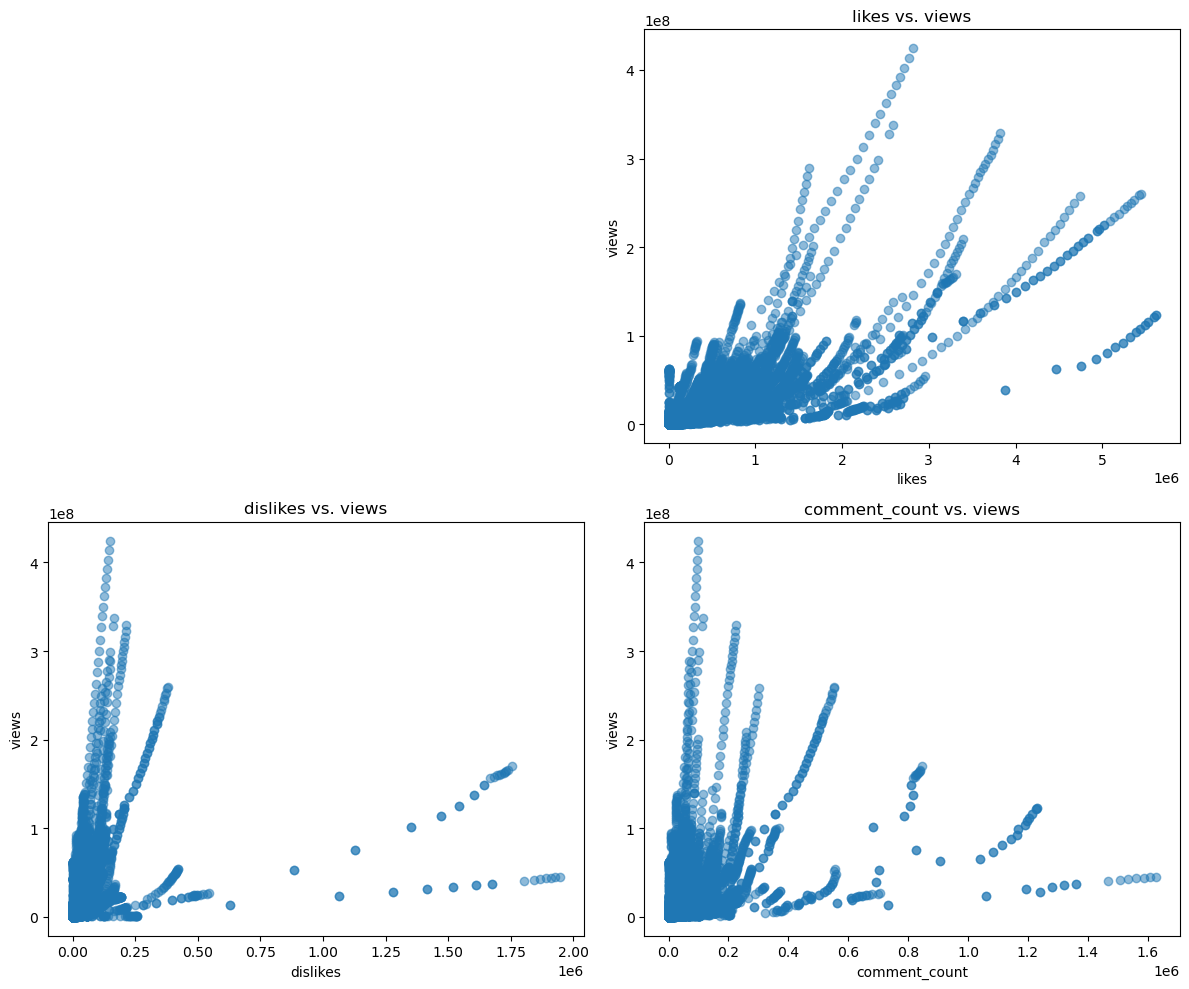

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical columns
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']


# Scatter plots for each numerical column vs. 'views'
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    if column != 'views':
        plt.subplot(2, 2, i)
        plt.scatter(merged_df[column], merged_df['views'], alpha=0.5)
        plt.title(f'{column} vs. views')
        plt.xlabel(column)
        plt.ylabel('views')

plt.tight_layout()
plt.show()

## EDA for Numerical Variables

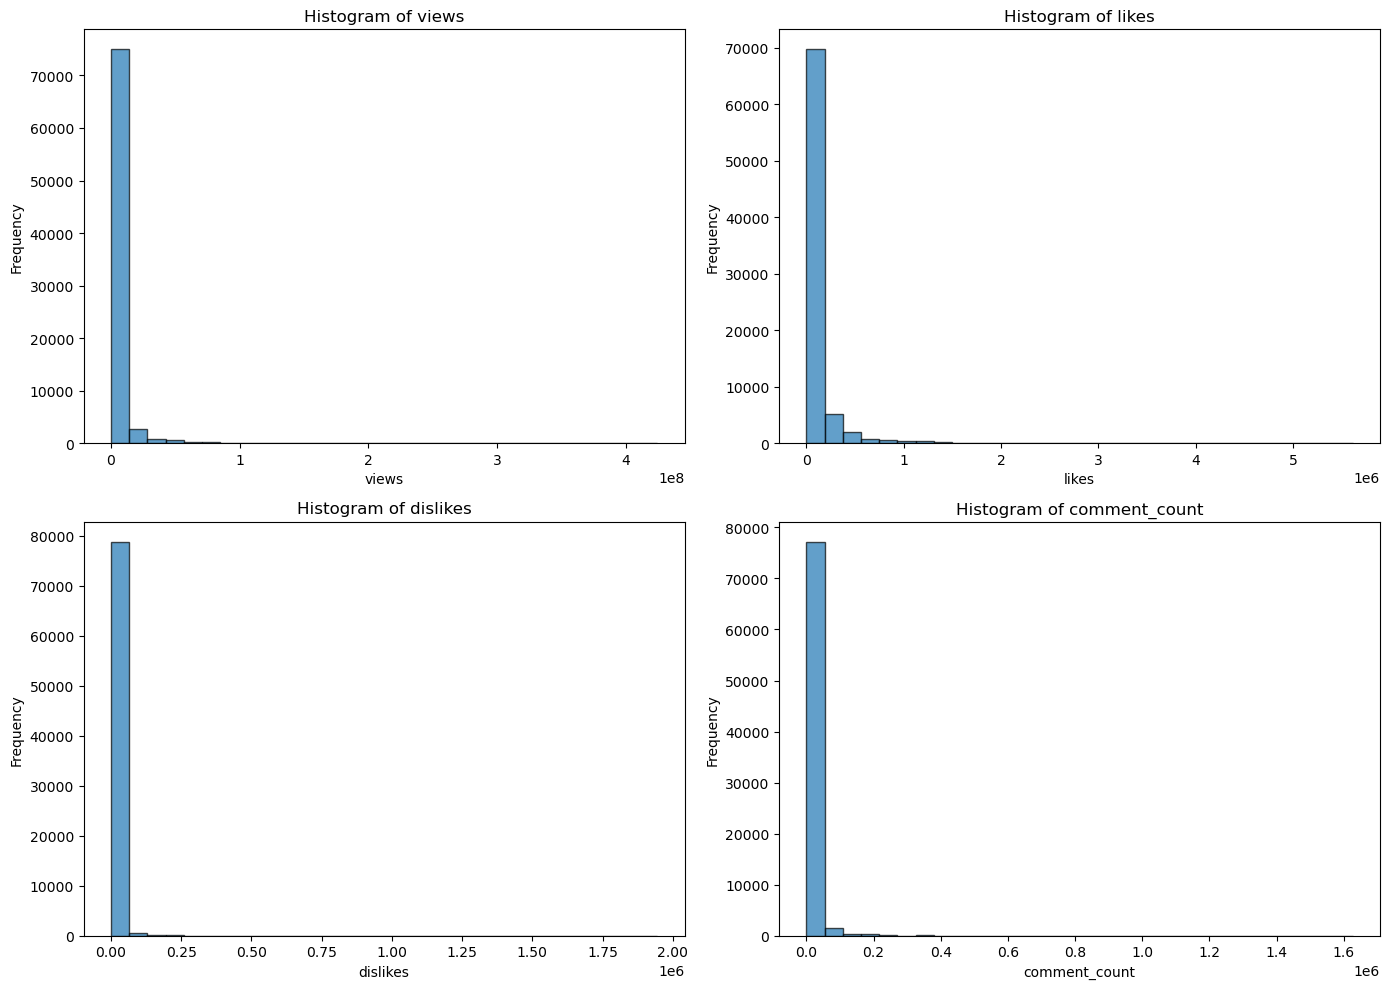

In [6]:
#data exploration for numerical columns
import matplotlib.pyplot as plt

# Define numerical columns
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']

# Create histograms for each numerical column
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(merged_df[column], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## EDA for Boolean Variables

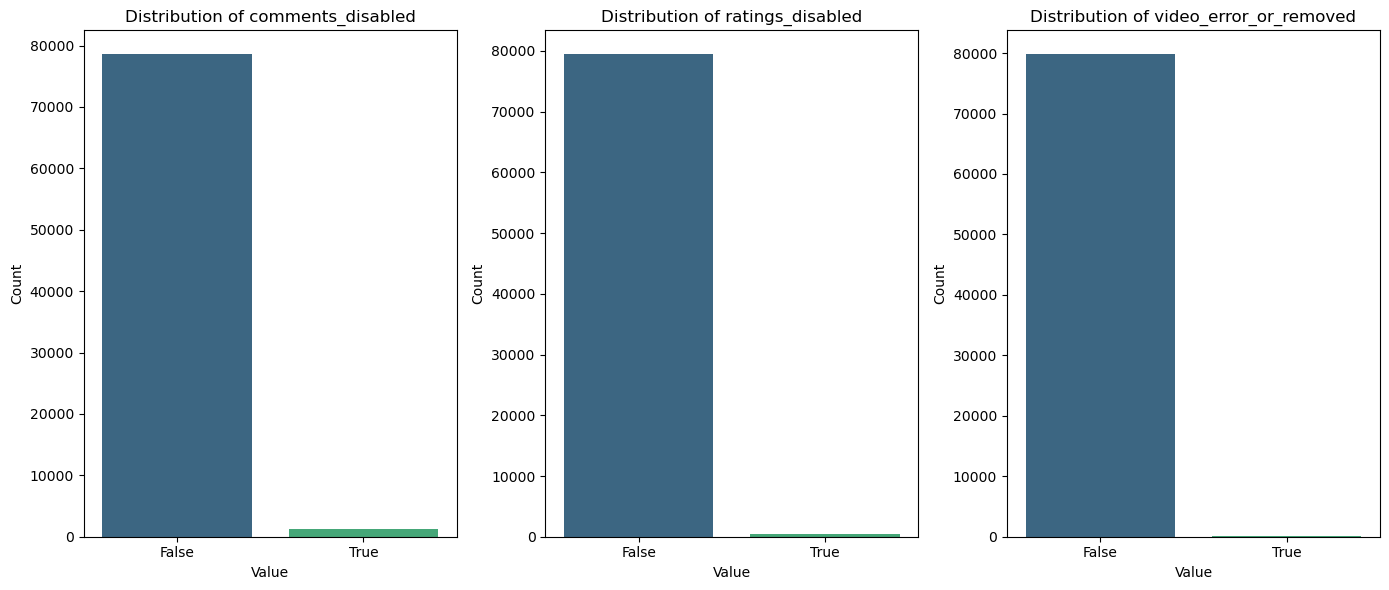

In [7]:
import seaborn as sns

# Define boolean columns
boolean_columns = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']

# Plot bar plots for each boolean column
plt.figure(figsize=(14, 6))
for i, column in enumerate(boolean_columns, 1):
    plt.subplot(1, 3, i)
    # Count the occurrences of each boolean value
    counts = merged_df[column].value_counts()
    # Plot bar plot
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## EDA for Date-Time Variables

/var/folders/yn/hnpfh1r15tq8t0xq_j4_rzmh0000gn/T/ipykernel_76686/1621989413.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(merged_df['trending_day_of_week'], discrete=True, palette='viridis')


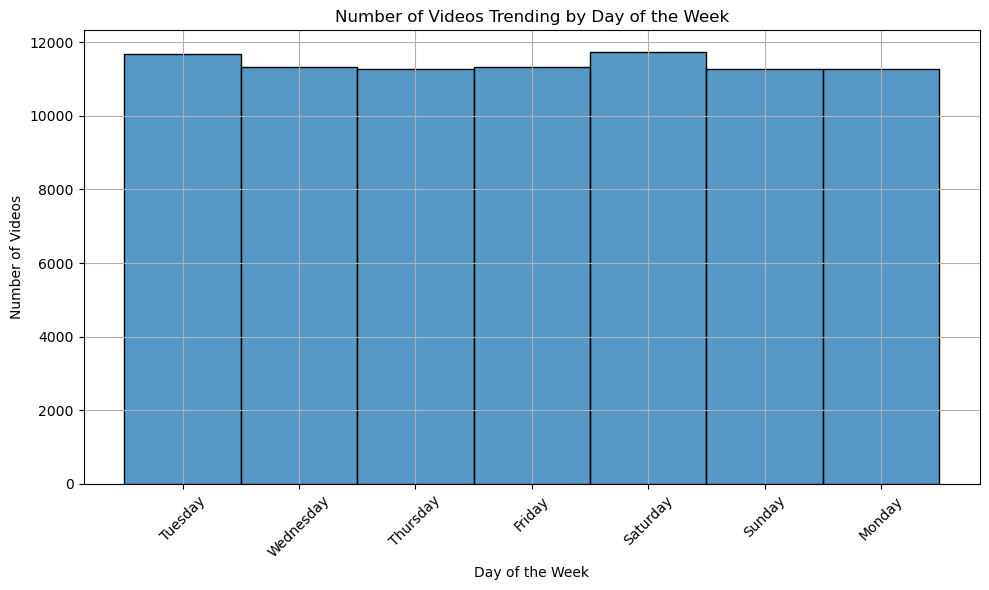

In [8]:
# convert the trending_date to datetime type
merged_df['trending_date'] = pd.to_datetime(merged_df['trending_date'], format='%y.%d.%m')
# Extract day of the week from 'trending_date'
merged_df['trending_day_of_week'] = merged_df['trending_date'].dt.day_name()

# Plot histogram of trending day of the week
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['trending_day_of_week'], discrete=True, palette='viridis')
plt.title('Number of Videos Trending by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/yn/hnpfh1r15tq8t0xq_j4_rzmh0000gn/T/ipykernel_76686/1346077495.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(merged_df['day_of_week'], discrete=True, palette='viridis')


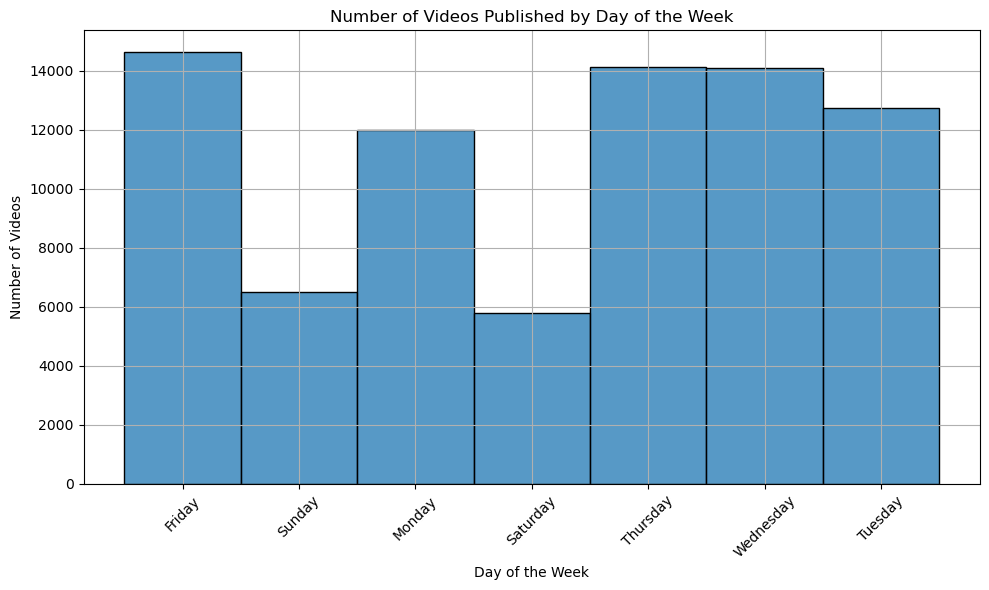

In [9]:
#convert the publish_date to datetime type
merged_df['publish_time'] = pd.to_datetime(merged_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
# Extract day of the week from 'publish_time'
merged_df['day_of_week'] = merged_df['publish_time'].dt.day_name()

# Plot histogram of day of the week
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['day_of_week'], discrete=True, palette='viridis')
plt.title('Number of Videos Published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistical Description

In [10]:
numerical_description = merged_df.describe()
print(numerical_description)

                       trending_date   category_id  \
count                          79865  79865.000000   
mean   2018-02-25 07:57:45.132410880     18.440205   
min              2017-11-14 00:00:00      1.000000   
25%              2018-01-02 00:00:00     10.000000   
50%              2018-02-23 00:00:00     22.000000   
75%              2018-04-21 00:00:00     24.000000   
max              2018-06-14 00:00:00     43.000000   
std                              NaN      7.818304   

                        publish_time         views         likes  \
count                          79865  7.986500e+04  7.986500e+04   
mean   2018-01-30 08:51:14.599436544  4.091166e+06  1.036262e+05   
min              2006-07-23 08:24:11  5.490000e+02  0.000000e+00   
25%              2017-12-22 15:58:16  2.464170e+05  5.642000e+03   
50%              2018-02-14 05:01:24  7.961060e+05  2.092200e+04   
75%              2018-04-09 08:59:51  2.535704e+06  7.824800e+04   
max              2018-06-14 01:31:53 

In [11]:
# Statistical description of categorical columns
categorical_description = merged_df[['category_id', 'location']].describe()
print(categorical_description)

        category_id
count  79865.000000
mean      18.440205
std        7.818304
min        1.000000
25%       10.000000
50%       22.000000
75%       24.000000
max       43.000000


# Visualization for Categorical ID

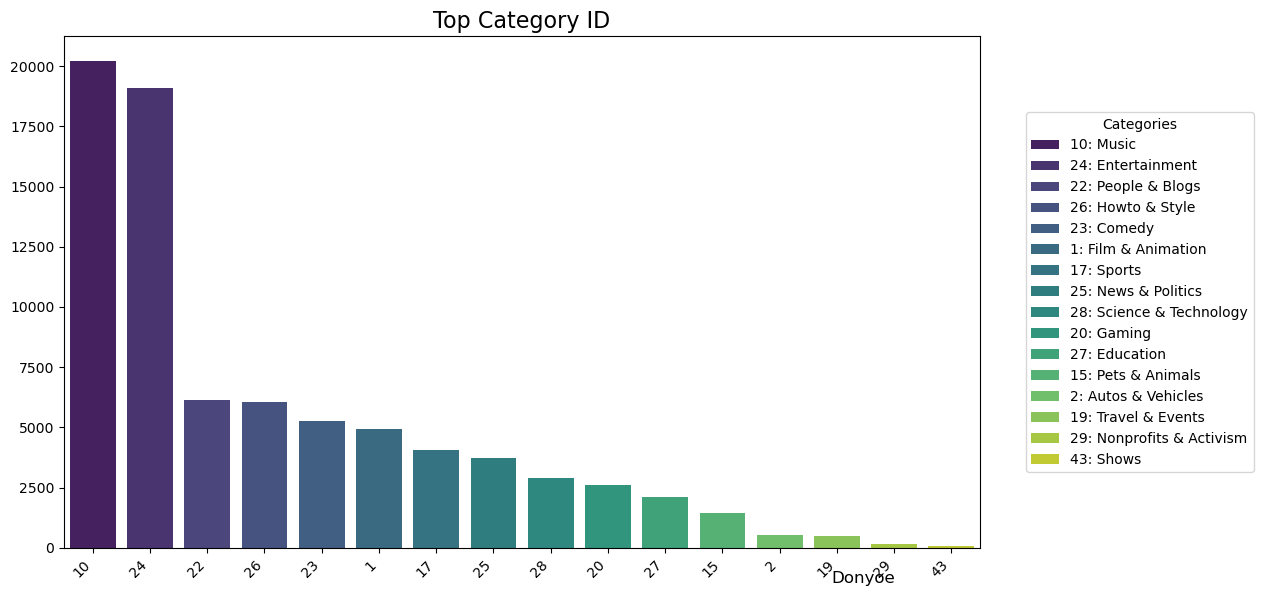

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by 'category_id' and count occurrences 
category_counts = merged_df.groupby('category_id').size().reset_index(name='N')

# Sort by 'N' in descending order
category_counts = category_counts.sort_values(by='N', ascending=False)
category_counts['category_id'] = pd.Categorical(category_counts['category_id'], categories=category_counts['category_id'], ordered=True)

# Create a dictionary to map 'category_id' to descriptive names
category_names = {
    1: "1: Film & Animation",
    2: "2: Autos & Vehicles",
    10: "10: Music",
    15: "15: Pets & Animals",
    17: "17: Sports",
    18: "18: Short Movies",
    19: "19: Travel & Events",
    20: "20: Gaming",
    21: "21: Videoblogging",
    22: "22: People & Blogs",
    23: "23: Comedy",
    24: "24: Entertainment",
    25: "25: News & Politics",
    26: "26: Howto & Style",
    27: "27: Education",
    28: "28: Science & Technology",
    29: "29: Nonprofits & Activism",
    30: "30: Movies",
    31: "31: Anime/Animation",
    32: "32: Action/Adventure",
    33: "33: Classics",
    34: "34: Comedy",
    35: "35: Documentary",
    36: "36: Drama",
    37: "37: Family",
    38: "38: Foreign",
    39: "39: Horror",
    40: "40: Sci-Fi/Fantasy",
    41: "41: Thriller",
    42: "42: Shorts",
    43: "43: Shows",
    44: "44: Trailers"
}

# Map 'category_id' to names in the 'category_counts' DataFrame
category_counts['category_name'] = category_counts['category_id'].map(category_names)

# Plot using seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=category_counts, x='category_id', y='N', palette='viridis')  # Assign to 'barplot'

# Customize the plot to match your ggplot2 example
plt.title("Top Category ID", fontsize=16)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.figtext(0.9, 0.02, "Donyoe", horizontalalignment='right', fontsize=12)

# Add a custom legend for category names on the side
handles = barplot.patches
legend_labels = [category_names[int(c)] for c in category_counts['category_id']]

# Position the legend on the right of the plot using 'bbox_to_anchor'
plt.legend(handles=handles[:len(legend_labels)], labels=legend_labels, title='Categories',
           bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)

plt.show()

# Data Transformation-Create Engagement Metrics

In [13]:
# Create a new column
merged_df['Engagement Metrics'] = merged_df['likes'] + merged_df['dislikes'] + merged_df['comment_count']
# Display the DataFrame to check the new column
print(merged_df[['likes', 'dislikes', 'comment_count', 'Engagement Metrics']].head())

    likes  dislikes  comment_count  Engagement Metrics
0   55681     10247           9479               75407
1   25561      2294           2757               30612
2  787420     43420         125882              956722
3     193        12             37                 242
4      30         2             30                  62


# Visualization-Engagement Metrics

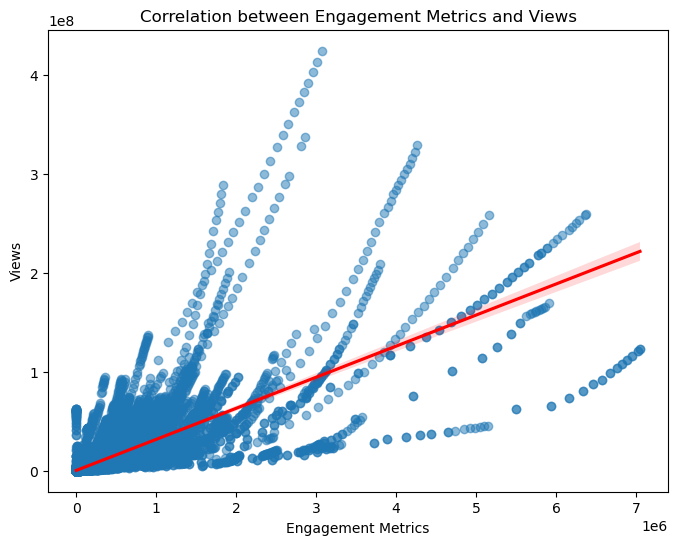

In [14]:
# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Engagement Metrics', y='views', data=merged_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between Engagement Metrics and Views')
plt.xlabel('Engagement Metrics')
plt.ylabel('Views')
plt.show()

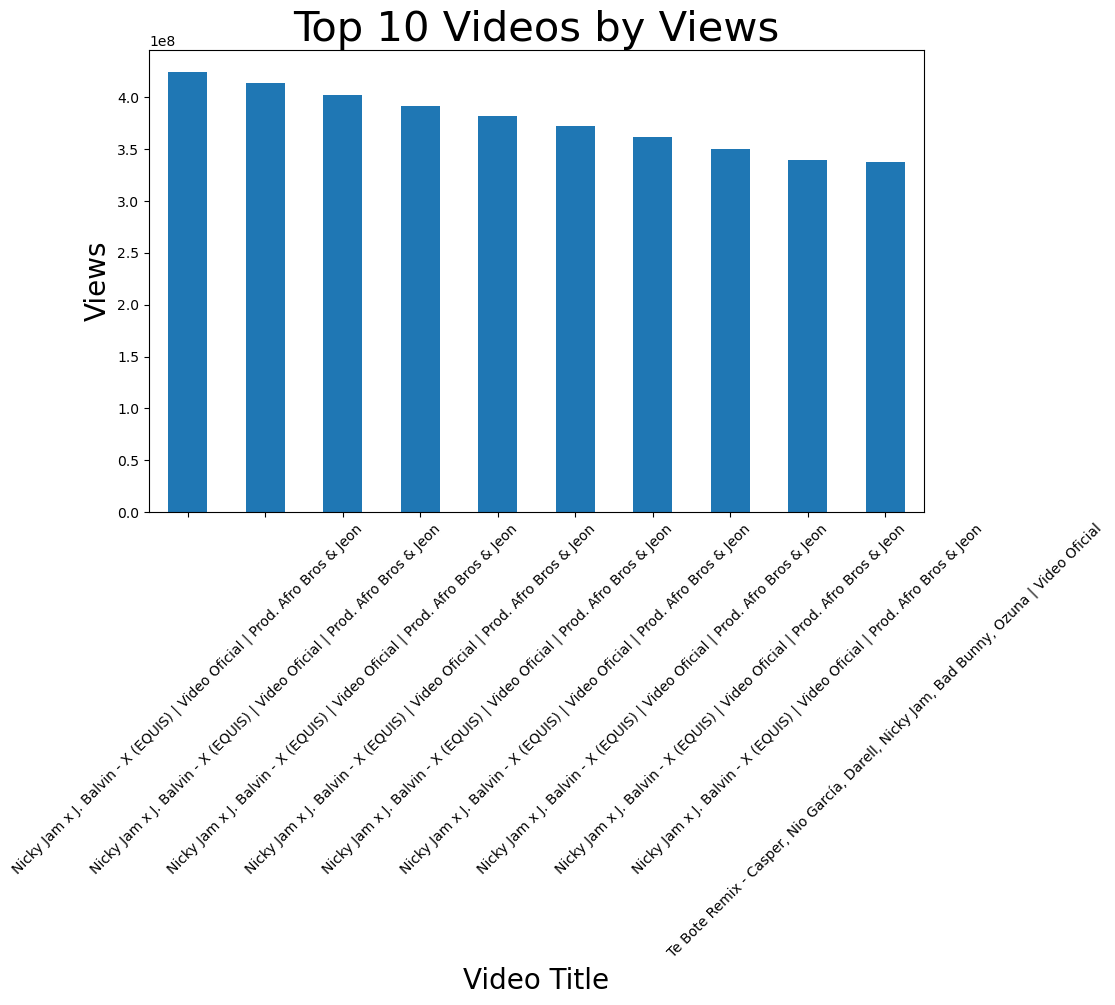

In [15]:
top_videos = merged_df.nlargest(10, 'views')[['title', 'views']]


top_videos.set_index('title')['views'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Video Title',fontsize=20)
plt.ylabel('Views',fontsize=20)
plt.title('Top 10 Videos by Views',fontsize=30)
plt.xticks(rotation=45)
plt.show()

In [16]:
# Engagement metrics for top 50 videos
top_50_videos = merged_df.nlargest(50, 'views')
print(top_50_videos[['title', 'Engagement Metrics','location']])

                                                   title  Engagement Metrics  \
28412  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             3067426   
28212  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             3011515   
28008  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2956724   
27811  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2902891   
27615  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2845332   
27424  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2786627   
27241  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2723032   
27052  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2650114   
26861  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2582218   
34460  Te Bote Remix - Casper, Nio García, Darell, Ni...             2862074   
25545               Bad Bunny - Amorfoda | Video Oficial             4264625   
34292  Te Bote Remix - Casper, Nio Garcí

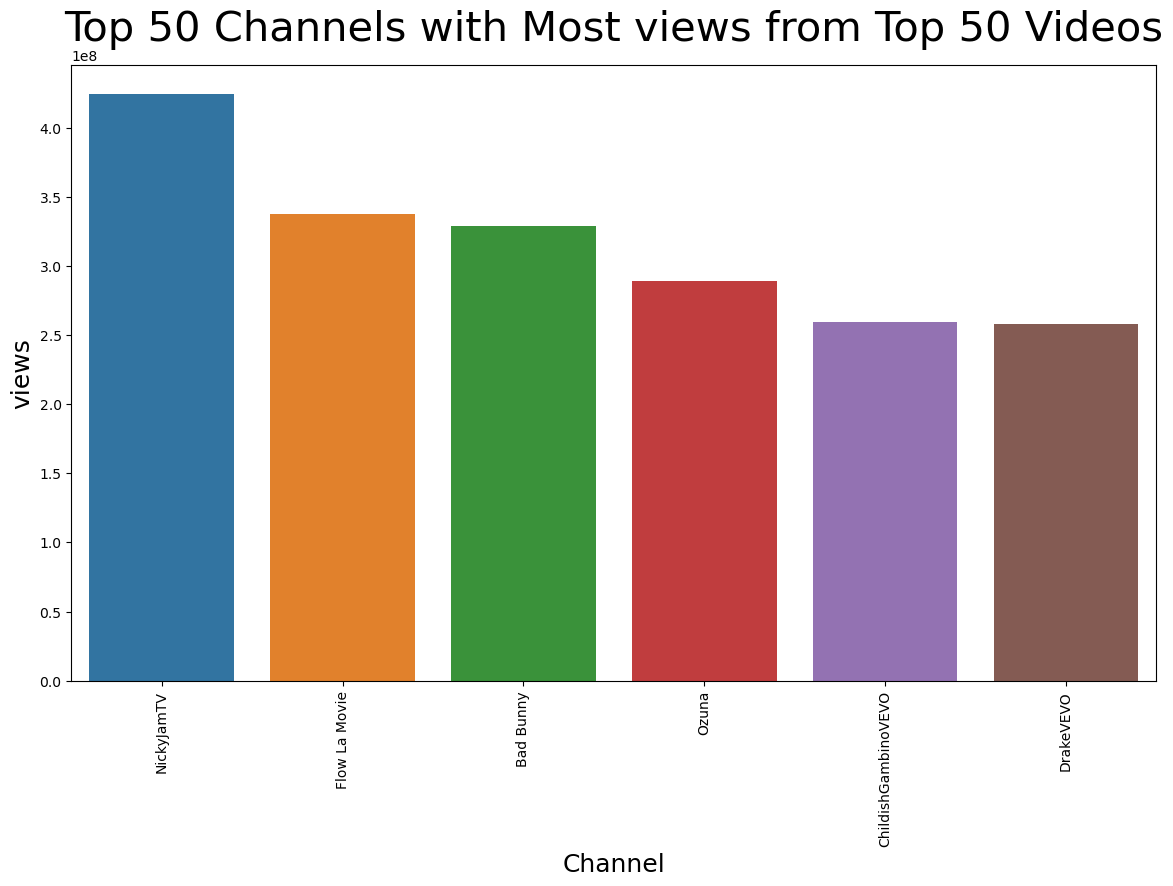

In [17]:
import seaborn as snb
content = top_50_videos.groupby('channel_title')['views'].max()

# Sort values to get the top 50 channels with the most views
content = content.sort_values(ascending=False).head(50)
content = content.reset_index()  # Convert index to column

# Plotting the results
plt.figure(figsize=(14, 8))
snb.barplot(x='channel_title', y='views', data=content)
plt.title('Top 50 Channels with Most views from Top 50 Videos', fontsize=30)
plt.ylabel('views', fontsize=18)
plt.xlabel('Channel', fontsize=18)
plt.xticks(rotation=90)
plt.show()

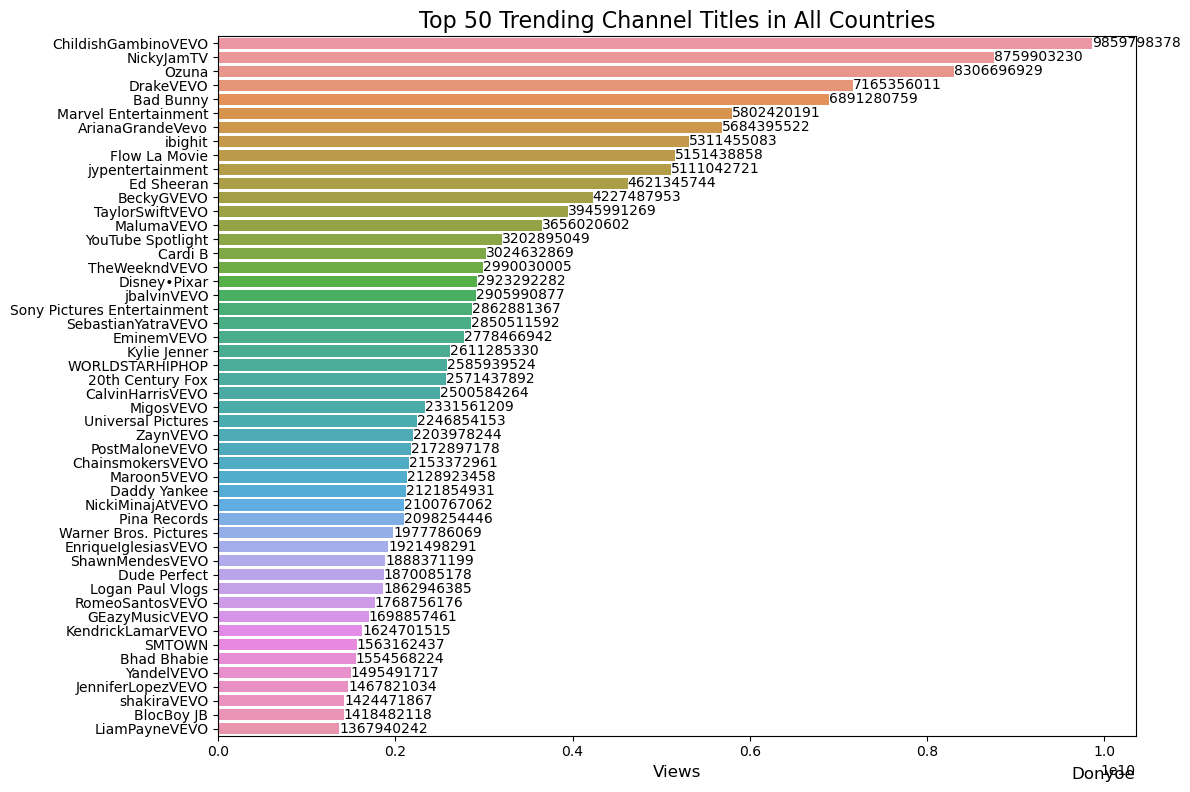

In [18]:
channel_counts = merged_df.groupby('channel_title')['views'].sum().reset_index()

# Sort values and select top 10 channels
top_10_channels = channel_counts.sort_values(by='views', ascending=False).head(50)

# Plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='views', y='channel_title', data=top_10_channels,orient='h')

# Add labels
for index, value in enumerate(top_10_channels['views']):
    ax.text(value, index, str(value), va='center', ha='left', color='black')

# Customize the plot
plt.title('Top 50 Trending Channel Titles in All Countries', fontsize=16)
plt.xlabel('Views', fontsize=12)
plt.ylabel(None)
plt.xticks(rotation=0)  # x-axis ticks don't need rotation in horizontal bar plot
plt.tight_layout()

# Add caption
plt.figtext(0.95, 0.02, "Donyoe", horizontalalignment='right', fontsize=12)

# Show the plot
plt.show()

# Normalize and Standardize Data

### Correlation Metrics for Variables

                  views     likes  dislikes  comment_count
views          1.000000  0.791670  0.405290       0.485986
likes          0.791670  1.000000  0.448010       0.763192
dislikes       0.405290  0.448010  1.000000       0.745064
comment_count  0.485986  0.763192  0.745064       1.000000


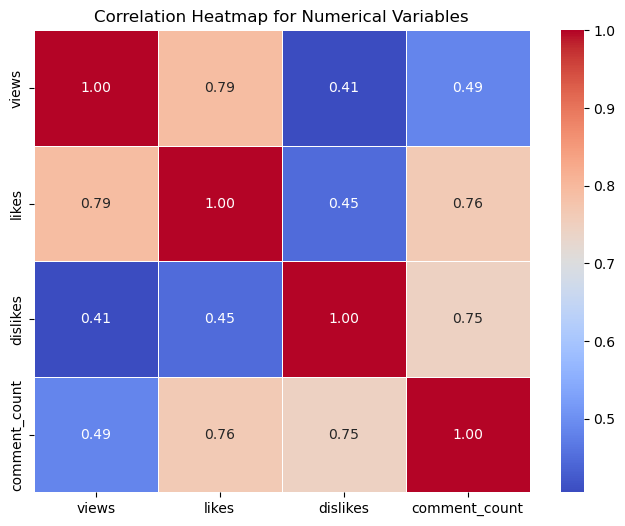

In [19]:
# add category_id to numerical columns
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count', ]

# Compute the correlation matrix
correlation_matrix = merged_df[numerical_columns].corr()
# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

### Assign Score for Numerical Values

In [20]:
import pandas as pd

# Assuming the correlation values are manually entered from the heatmap
correlation_values = {
    'likes': 0.784,          # Correlation of likes with views
    'dislikes': 0.416,       # Correlation of dislikes with views
    'comment_count': 0.502 # Correlation of comment_count with views
}

# Convert the correlation values to absolute values
abs_correlations = {key: abs(value) for key, value in correlation_values.items()}

# Calculate the total sum of absolute correlations
total_correlation = sum(abs_correlations.values())

# Calculate weights by normalizing the absolute correlation values
weights = {key: value / total_correlation for key, value in abs_correlations.items()}

# Convert the weights to a DataFrame for better visualization
weights_df = pd.DataFrame(list(weights.items()), columns=['Variable', 'Weight'])

# Display the weights
print("Calculated Weights of Independent Variables Relative to 'Views':")
print(weights_df)

Calculated Weights of Independent Variables Relative to 'Views':
        Variable    Weight
0          likes  0.460635
1       dislikes  0.244418
2  comment_count  0.294947


In [21]:
import pandas as pd

weights = {
    'likes': 0.460435,
    'dislikes': 0.244418,
    'comment_count': 0.294947
}

merged_df['score'] = (
    weights['likes'] * merged_df['likes'] -
    weights['dislikes'] * merged_df['dislikes'] +
    weights['comment_count'] * merged_df['comment_count'] 
)

merged_df['rank'] = merged_df['score'].rank(ascending=False, method='min')

df_sorted = merged_df.sort_values(by='rank')

print(df_sorted)

#output_filename = 'ranked_videos_combined.csv'
#df_sorted.to_csv(output_filename, index=False)

#print("Listing of Every Video with Individual Scores and Ranks Across All Locations:")
#print(df_sorted[['video_id', 'views', 'likes', 'dislikes', 'comment_count', 'category_id', 'location', 'score', 'rank']])
#print(f"\nThe ranking of all videos from all locations has been saved to '{output_filename}'.")


          video_id trending_date                                  title  \
36638  7C2z4GqqS5E    2018-06-01    BTS (방탄소년단) 'FAKE LOVE' Official MV   
77189  7C2z4GqqS5E    2018-06-01    BTS (방탄소년단) 'FAKE LOVE' Official MV   
76988  7C2z4GqqS5E    2018-05-31    BTS (방탄소년단) 'FAKE LOVE' Official MV   
36468  7C2z4GqqS5E    2018-05-31    BTS (방탄소년단) 'FAKE LOVE' Official MV   
36288  7C2z4GqqS5E    2018-05-30    BTS (방탄소년단) 'FAKE LOVE' Official MV   
...            ...           ...                                    ...   
9146   LFhT6H6pRWg    2017-12-29  PSA from Chairman of the FCC Ajit Pai   
9354   LFhT6H6pRWg    2017-12-30  PSA from Chairman of the FCC Ajit Pai   
9575   LFhT6H6pRWg    2017-12-31  PSA from Chairman of the FCC Ajit Pai   
9777   LFhT6H6pRWg    2018-01-01  PSA from Chairman of the FCC Ajit Pai   
9985   LFhT6H6pRWg    2018-01-02  PSA from Chairman of the FCC Ajit Pai   

      channel_title  category_id        publish_time  \
36638       ibighit           10 2018-05-18

### EDA for Score for Top 50 Channels

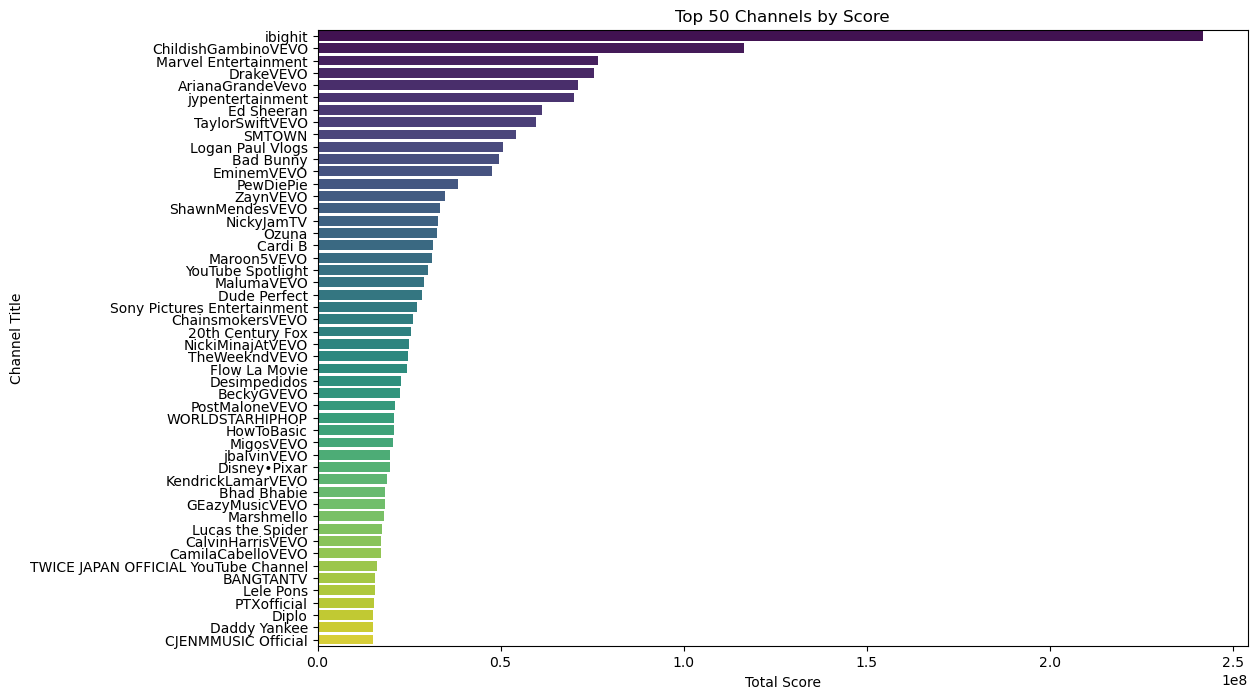

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'train'
weights = {
    'likes': 0.460435,
    'dislikes': 0.244418,
    'comment_count': 0.294947
}

# Calculate score and rank
merged_df['score'] = (
    weights['likes'] * merged_df['likes'] -
    weights['dislikes'] * merged_df['dislikes'] +
    weights['comment_count'] * merged_df['comment_count']
)

merged_df['rank'] = merged_df['score'].rank(ascending=False, method='min')

# Group by channel_title and sum the scores
channel_scores = merged_df.groupby('channel_title')['score'].sum().reset_index()

# Sort by total score and get top 50 channels
top_channels = channel_scores.sort_values(by='score', ascending=False).head(50)

# Create a bar plot for the top 50 channels
plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='channel_title', data=top_channels, palette='viridis')
plt.title('Top 50 Channels by Score')
plt.xlabel('Total Score')
plt.ylabel('Channel Title')
plt.show()

# Create Word Cloud

### Video Titles

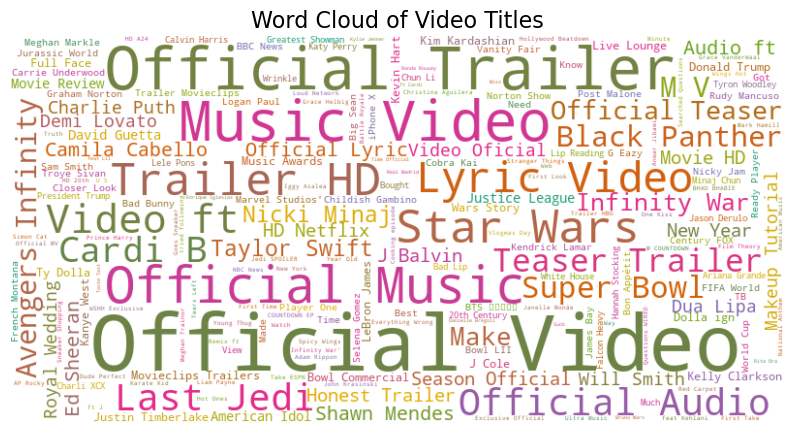

In [23]:
from wordcloud import WordCloud
from palettable.colorbrewer.qualitative import Dark2_6

# Assuming your DataFrame is named 'mergeda_df'
# Concatenate all titles into a single string
all_titles = " ".join(merged_df['title'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_titles)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Video Titles', fontsize=16)
plt.show()

### Channel Titles

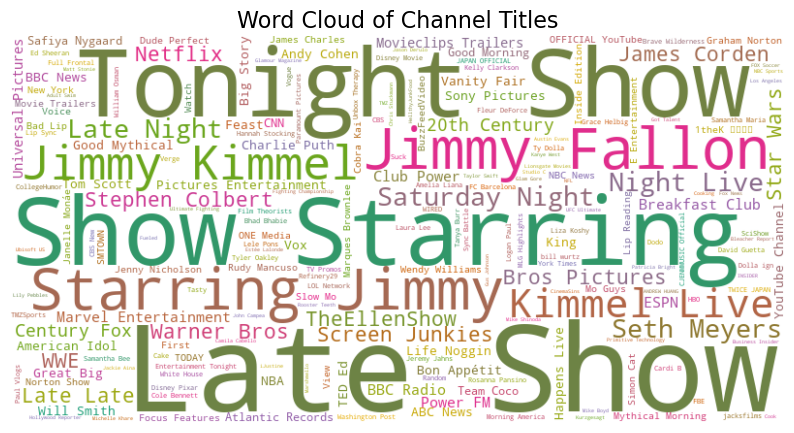

In [24]:
all_channel_titles = " ".join(merged_df['channel_title'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_channel_titles)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Channel Titles', fontsize=16)
plt.show()

### Video Tags

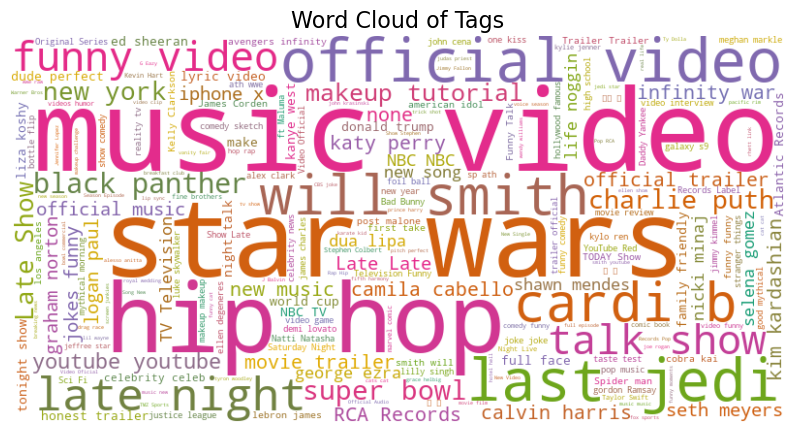

In [25]:
# Creating Word Cloud-tags
all_tags = " ".join(merged_df['tags'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_tags)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Tags', fontsize=16)
plt.show()

### Video Descriptions

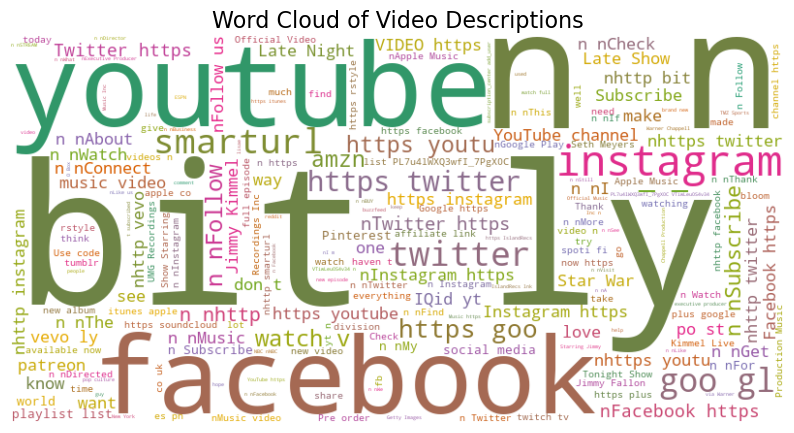

In [26]:
all_description = " ".join(merged_df['description'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_description)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Video Descriptions', fontsize=16)
plt.show()

# Drop Unnecessary Columns

In [27]:
#drop columns needed
merged_df.drop(columns=['thumbnail_link', 'video_id','comments_disabled','ratings_disabled','video_error_or_removed'], inplace=True)

print(merged_df.head())

  trending_date                                              title  \
0    2017-11-14      John Lewis Christmas Ad 2017 - #MozTheMonster   
1    2017-11-14          Taylor Swift: …Ready for It? (Live) - SNL   
2    2017-11-14         Eminem - Walk On Water (Audio) ft. Beyoncé   
3    2017-11-14  Goals from Salford City vs Class of 92 and Fri...   
4    2017-11-14  Dashcam captures truck's near miss with child ...   

                channel_title  category_id        publish_time  \
0                  John Lewis           26 2017-11-10 07:38:29   
1         Saturday Night Live           24 2017-11-12 06:24:44   
2                  EminemVEVO           10 2017-11-10 17:00:03   
3  Salford City Football Club           17 2017-11-13 02:30:38   
4            Cute Girl Videos           25 2017-11-13 01:45:13   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1  SNL|"Saturday Night Live"|"SNL 

# Text Preprocessing 

In [28]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

# Get the list of default English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords and clean text
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove non-alphabetical characters (retain only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Split text into words
    words = text.split()
    
    # Remove stopwords
    remove_stopwords = [word for word in words if word not in stop_words]
    
    # Join the cleaned words back into a string
    new_text = ' '.join(remove_stopwords)
    
    return new_text
    data = {'title','description','text'}
    
# Apply the clean_text function to the 'title' column in merged_df1
merged_df['new_text'] = merged_df['title'].apply(clean_text)

# Display the cleaned DataFrame
print(merged_df)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuhanzhao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


      trending_date                                              title  \
0        2017-11-14      John Lewis Christmas Ad 2017 - #MozTheMonster   
1        2017-11-14          Taylor Swift: …Ready for It? (Live) - SNL   
2        2017-11-14         Eminem - Walk On Water (Audio) ft. Beyoncé   
3        2017-11-14  Goals from Salford City vs Class of 92 and Fri...   
4        2017-11-14  Dashcam captures truck's near miss with child ...   
...             ...                                                ...   
79860    2018-06-14                       The Cat Who Caught the Laser   
79861    2018-06-14                         True Facts : Ant Mutualism   
79862    2018-06-14  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
79863    2018-06-14                How Black Panther Should Have Ended   
79864    2018-06-14  Official Call of Duty®: Black Ops 4 — Multipla...   

                    channel_title  category_id        publish_time  \
0                      John Lewis        

In [29]:
# Check the data types of each column
print(merged_df.dtypes)

trending_date           datetime64[ns]
title                           object
channel_title                   object
category_id                      int64
publish_time            datetime64[ns]
tags                            object
views                            int64
likes                            int64
dislikes                         int64
comment_count                    int64
description                     object
location                        object
trending_day_of_week            object
day_of_week                     object
Engagement Metrics               int64
score                          float64
rank                           float64
new_text                        object
dtype: object


# Split the Dataset into Train and Test by 80/20

In [30]:
from sklearn.model_selection import train_test_split

X = merged_df.drop(columns=['views'])  # Drop 'views' from features to get X
y = merged_df['views']
# Assuming you have a dataset with features X and target y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

train = pd.DataFrame(X_train)
train['views'] = y_train.values

test = pd.DataFrame(X_test)
test['views'] = y_test.values

# Feature Engineering

## Days Since Published

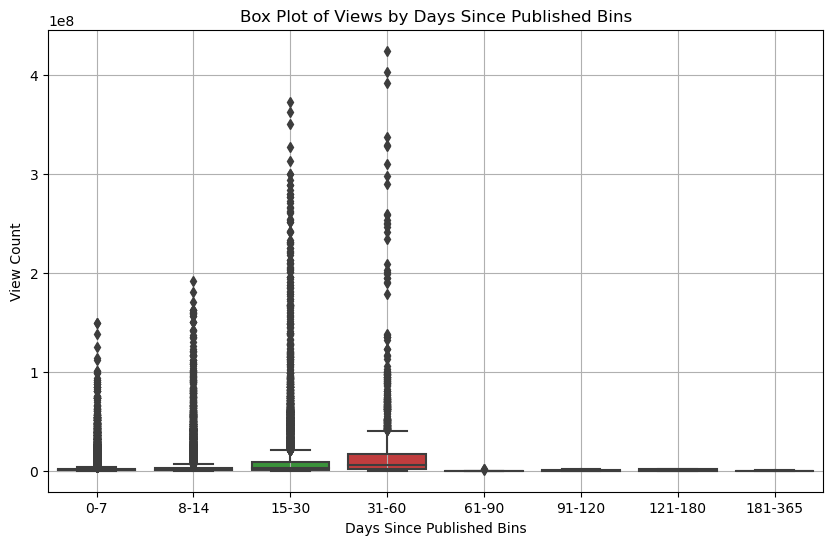

In [31]:
#convert the type of publish time
train['publish_time'] = pd.to_datetime(train['publish_time'])
train['trending_date'] = pd.to_datetime(train['trending_date'], format='%Y-%m-%d')

# Creating a new feature 'days_since_published'
train['days_since_published'] = (train['trending_date'] - train['publish_time']).dt.days

# Creating bins for days since published
bins = [0, 7, 14, 30, 60, 90, 120, 180, 365]  # Example bins
labels = ['0-7', '8-14', '15-30', '31-60', '61-90', '91-120', '121-180', '181-365']
train['days_bins'] = pd.cut(train['days_since_published'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='days_bins', y='views')
plt.title('Box Plot of Views by Days Since Published Bins')
plt.xlabel('Days Since Published Bins')
plt.ylabel('View Count')
plt.grid(True)
plt.show()

## Sentimental Analysis

In [32]:
 !pip install textblob


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


#### Sentiment Polarity Distribution

Average Description Sentiment Score: 0.1716764242965884
Average Title Sentiment Score: 0.0477964529239135


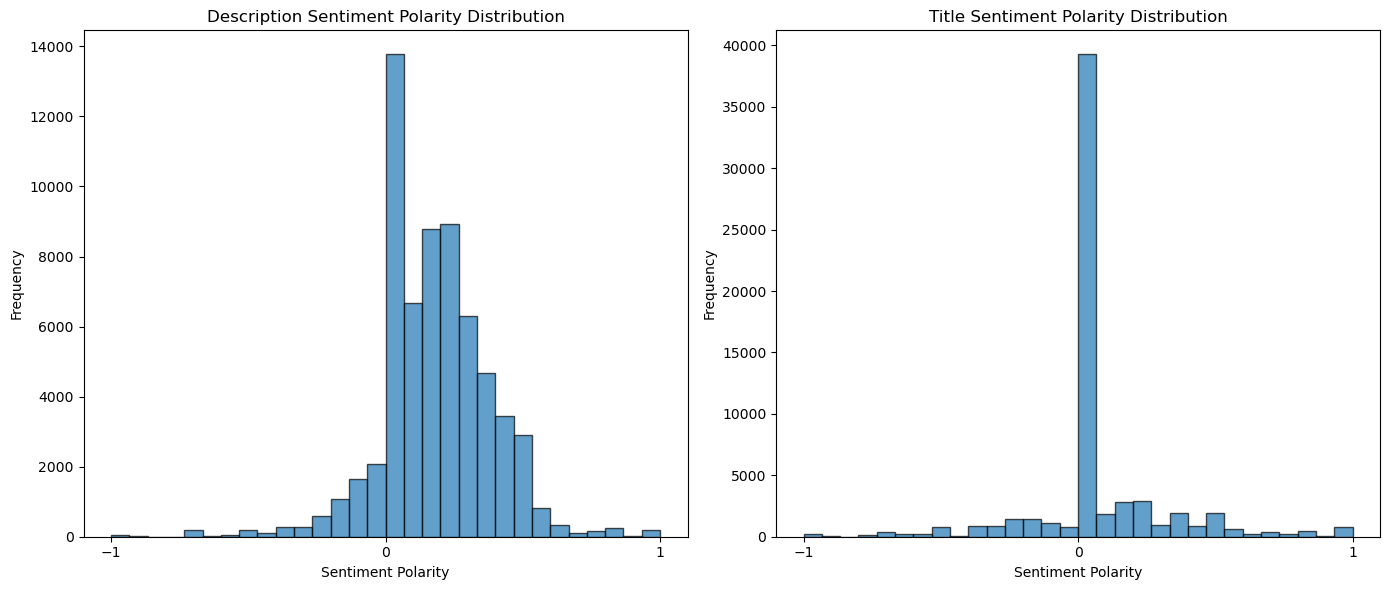

In [33]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Calculate sentiment polarity for description and title
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
train['description_sentiment'] = train['description'].fillna('').apply(get_sentiment)
train['title_sentiment'] = train['title'].fillna('').apply(get_sentiment)

# Calculate average sentiment scores
avg_description_sentiment = train['description_sentiment'].mean()
avg_title_sentiment = train['title_sentiment'].mean()

print("Average Description Sentiment Score:", avg_description_sentiment)
print("Average Title Sentiment Score:", avg_title_sentiment)

# Plotting the sentiment distributions
plt.figure(figsize=(14, 6))

# Description Sentiment Histogram
plt.subplot(1, 2, 1)
plt.hist(train['description_sentiment'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Description Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.xticks([-1, 0, 1])

# Title Sentiment Histogram
plt.subplot(1, 2, 2)
plt.hist(train['title_sentiment'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Title Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.xticks([-1, 0, 1])

plt.tight_layout()
plt.show()

#### Visualize the Sentiment Distrubution Category

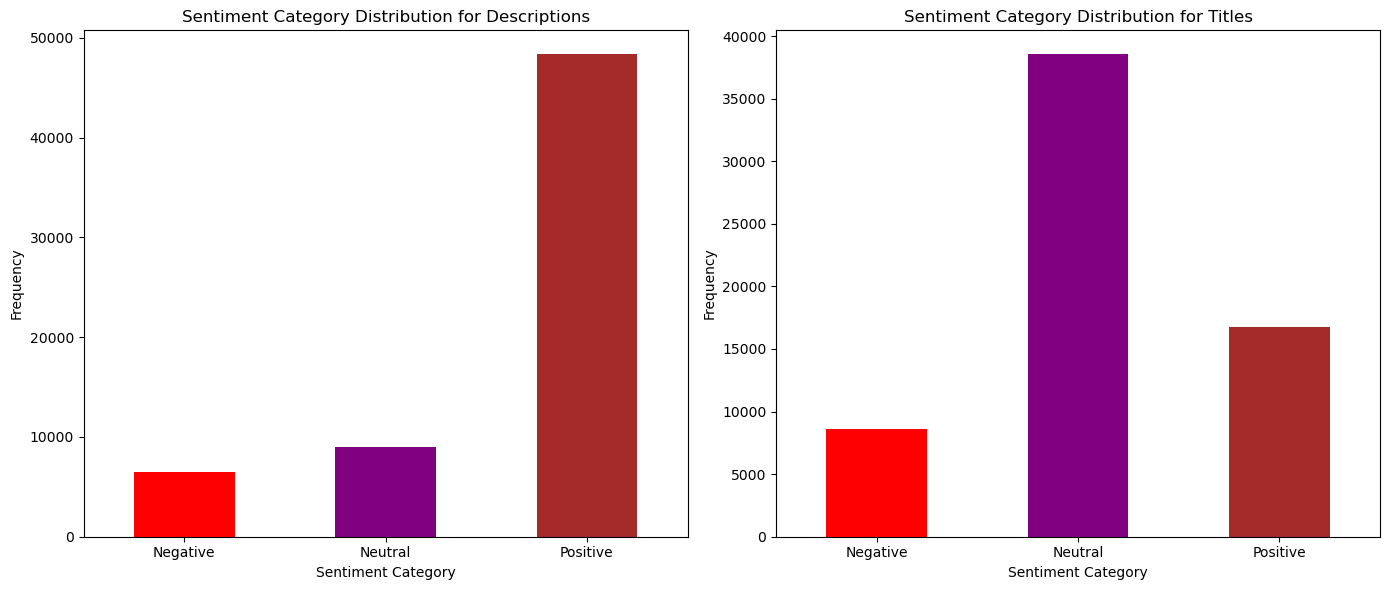

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Define sentiment categories
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorization to sentiment columns
train['description_sentiment_category'] = train['description_sentiment'].apply(categorize_sentiment)
train['title_sentiment_category'] = train['title_sentiment'].apply(categorize_sentiment)

# Plot sentiment category distribution for descriptions and titles
plt.figure(figsize=(14, 6))

# Custom order for categories
category_order = ['Negative', 'Neutral', 'Positive']

# Plot description sentiment distribution
plt.subplot(1, 2, 1)
description_sentiment_counts = train['description_sentiment_category'].value_counts().reindex(category_order)
description_sentiment_counts.plot(kind='bar', color=['red', 'purple', 'brown'])
plt.title('Sentiment Category Distribution for Descriptions')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Plot title sentiment distribution
plt.subplot(1, 2, 2)
title_sentiment_counts = train['title_sentiment_category'].value_counts().reindex(category_order)
title_sentiment_counts.plot(kind='bar', color=['red', 'purple', 'brown'])
plt.title('Sentiment Category Distribution for Titles')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Create TF-IDF Feature 

#### `description` Column

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
 
# Ensure the 'description' column exists in the DataFrame
if 'description' in train.columns:
    # Assuming 'description' column contains the text data
    text_data = train['description'].fillna('')  # Handle missing values
    
    # Check if text_data is iterable, not a single string
    if isinstance(text_data, pd.Series):
        # Initialize the TF-IDF Vectorizer
        tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
        
        # Fit and transform the text data to generate the TF-IDF matrix
        tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
        
        # Convert the sparse matrix into a DataFrame for easier manipulation
        tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
        
        # Function to get top N features per row based on TF-IDF score
        def get_top_tfidf_features(row, features, top_n=5):
            top_indices = np.argsort(row)[::-1][:top_n]  # Get the indices of the top n features
            top_features = [(features[i], row[i]) for i in top_indices]  # Get feature names and scores
            return top_features

        # Apply the function to each row in the TF-IDF matrix
        top_tfidf_features = [get_top_tfidf_features(row, tfidf_vectorizer.get_feature_names_out(), top_n=5) 
                              for row in tfidf_matrix.toarray()]
        
        # Add the top TF-IDF features as a new column in the original DataFrame
        train['top_tfidf_features'] = top_tfidf_features
        
        # Display the entire first 5 rows of the DataFrame including the top TF-IDF features
        print(train.head(5))
    else:
        print("The 'description' column should be a pandas Series.")
else:
    print("The DataFrame does not contain a 'description' column.")

      trending_date                                              title  \
23604    2018-03-14                   Marshmello & Anne-Marie: Friends   
25630    2018-03-24  Kirby Star Allies' Surprising HD Rumble Secret...   
68698    2018-04-20  Stephen A.: Kevin Hart 'got his feelings hurt'...   
39559    2017-11-17                              How to be an Aquarius   
62877    2018-03-16  Charlie Puth - Done For Me (feat. Kehlani) [Of...   

                                channel_title  category_id  \
23604  The Tonight Show Starring Jimmy Fallon           23   
25630                              GameXplain           20   
68698                                    ESPN           17   
39559                                Sailor J           24   
62877                            Charlie Puth           10   

             publish_time                                               tags  \
23604 2018-03-07 14:00:03  The Tonight Show|"Jimmy Fallon"|"Marshmello"|"...   
25630 2018-03-16 04:00

#### `tags` Column

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
 
# Ensure the 'description' column exists in the DataFrame
if 'tags' in train.columns:
    # Assuming 'description' column contains the text data
    text_data = train['tags'].fillna('')  # Handle missing values
    
    # Check if text_data is iterable, not a single string
    if isinstance(text_data, pd.Series):
        # Initialize the TF-IDF Vectorizer
        tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
        
        # Fit and transform the text data to generate the TF-IDF matrix
        tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
        
        # Convert the sparse matrix into a DataFrame for easier manipulation
        tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
        
        # Function to get top N features per row based on TF-IDF score
        def get_top_tfidf_features(row, features, top_n=5):
            top_indices = np.argsort(row)[::-1][:top_n]  # Get the indices of the top n features
            top_features = [(features[i], row[i]) for i in top_indices]  # Get feature names and scores
            return top_features

        # Apply the function to each row in the TF-IDF matrix
        top_tfidf_features = [get_top_tfidf_features(row, tfidf_vectorizer.get_feature_names_out(), top_n=5) 
                              for row in tfidf_matrix.toarray()]
        
        # Add the top TF-IDF features as a new column in the original DataFrame
        train['top_tfidf_features'] = top_tfidf_features
        
        # Display the entire first 5 rows of the DataFrame including the top TF-IDF features
        print(train.head(5))
    else:
        print("The 'description' column should be a pandas Series.")
else:
    print("The DataFrame does not contain a 'description' column.")

      trending_date                                              title  \
23604    2018-03-14                   Marshmello & Anne-Marie: Friends   
25630    2018-03-24  Kirby Star Allies' Surprising HD Rumble Secret...   
68698    2018-04-20  Stephen A.: Kevin Hart 'got his feelings hurt'...   
39559    2017-11-17                              How to be an Aquarius   
62877    2018-03-16  Charlie Puth - Done For Me (feat. Kehlani) [Of...   

                                channel_title  category_id  \
23604  The Tonight Show Starring Jimmy Fallon           23   
25630                              GameXplain           20   
68698                                    ESPN           17   
39559                                Sailor J           24   
62877                            Charlie Puth           10   

             publish_time                                               tags  \
23604 2018-03-07 14:00:03  The Tonight Show|"Jimmy Fallon"|"Marshmello"|"...   
25630 2018-03-16 04:00

# Dimension Reduction-PCA

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

non_numeric_cols = ['publish_time', 'title', 'channel_title', 'tags', 'description', 'location', 'trending_date', 'trending_day_of_week', 'day_of_week']
X_train_model = train.drop(columns=non_numeric_cols + ['views']).select_dtypes(include=[float, int])
X_test_model = test.drop(columns=non_numeric_cols + ['views']).select_dtypes(include=[float, int])

X_test_model = X_test_model.reindex(columns=X_train_model.columns, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_model)
X_test_scaled = scaler.transform(X_test_model)

print("Missing values in X_train_model:\n", X_train_model.isna().sum())
print("Missing values in X_test_model:\n", X_test_model.isna().sum())


Missing values in X_train_model:
 category_id              0
likes                    0
dislikes                 0
comment_count            0
Engagement Metrics       0
score                    0
rank                     0
days_since_published     0
description_sentiment    0
title_sentiment          0
dtype: int64
Missing values in X_test_model:
 category_id              0
likes                    0
dislikes                 0
comment_count            0
Engagement Metrics       0
score                    0
rank                     0
days_since_published     0
description_sentiment    0
title_sentiment          0
dtype: int64


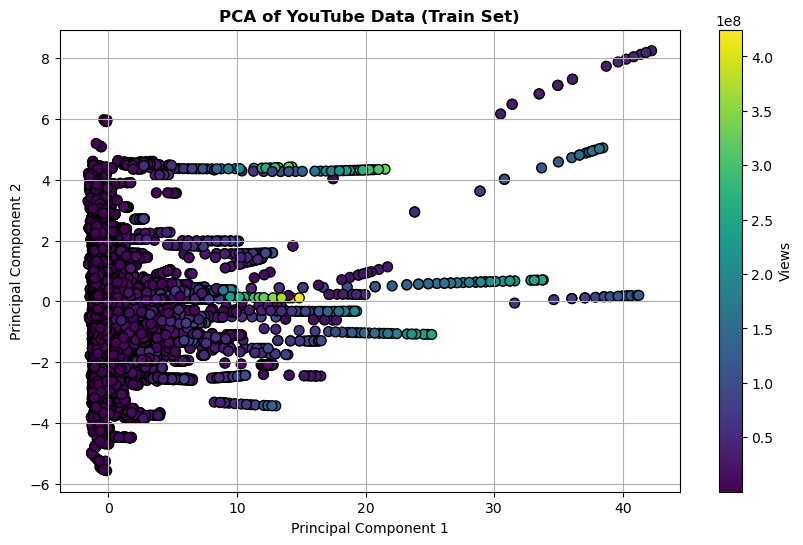

Explained Variance per component:
PC1: 43.35%
PC2: 12.56%
PC3: 11.40%
PC4: 10.22%
PC5: 7.73%
PC6: 7.47%
PC7: 5.90%


In [38]:
# Apply PCA (Reduce to n components to capture 95% of variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualize the PCA results (Plot only the first two components)
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label='Views')
plt.title('PCA of YouTube Data (Train Set)', weight='bold')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Explained variance for all components selected by PCA
explained_variance = pca.explained_variance_ratio_
print("Explained Variance per component:")
for i, variance in enumerate(explained_variance, start=1):
     print(f"PC{i}: {variance:.2%}")


# Model Building

## First Model-XGBoost

In [39]:
 pip install xgboost

In [40]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

In [41]:
# Parameters (basic setup, tune based on results)
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}

# Train the model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

In [42]:
# Predictions
y_pred = bst.predict(dtest)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

RMSE: 7953991.516667129
R^2 Score: 0.7069162313831201


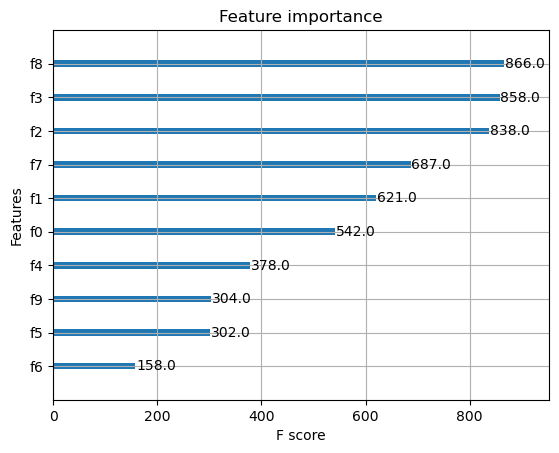

In [43]:
# If trained using xgb.train, plot importance
xgb.plot_importance(bst, max_num_features=10)
plt.show()


## Another Approach-XGBoost

The model approach chosen for this week is XGBoost. XGBoost is a gradient boosting algorithm widely used for structured/tabular data, especially when aiming to capture complex interactions between variables. It’s particularly suited to this task as it efficiently handles large datasets, offers built-in regularization to prevent overfitting, and allows flexibility in tuning various hyperparameters for optimization. This makes XGBoost an effective choice for regression tasks on datasets like YouTube metrics, where sentiment analysis and engagement metrics play significant roles in predicting user interactions.

XGBoost is a relatively complex modeling approach compared to simpler algorithms like linear regression. It builds an ensemble of decision trees in a sequential manner, where each tree aims to correct the errors made by the previous ones. This iterative correction improves predictive power but requires balancing complexity and training time, especially with deep trees and large numbers of boosting rounds. Additionally, XGBoost uses gradient-based methods to minimize loss and includes hyperparameters like learning rate, tree depth, and column sampling to control overfitting, adding layers of complexity in tuning.

In [44]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [45]:
# Define a function for calculating model metrics
def calculate_metrics(model, X_train, y_train, X_test, y_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Calculate RMSE and R^2 for training and test sets
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)

    return {
        "Train RMSE": train_rmse, "Test RMSE": val_rmse,
        "Train R^2": train_r2, "Test R^2": val_r2
    }

In [46]:
# Define a function to train the model with specific hyperparameters
def train_xgboost(X_train, y_train, X_test, y_test, params):
    model = xgb.XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    # Calculate and return metrics
    metrics = calculate_metrics(model, X_train, y_train, X_test, y_test)
    return model, metrics


In [47]:
# Define hyperparameter variations
variations = [
    {"learning_rate": 0.1, "n_estimators": 100, "max_depth": 4},
    {"learning_rate": 0.05, "n_estimators": 200, "max_depth": 6},
    {"learning_rate": 0.01, "n_estimators": 300, "max_depth": 8}
]

In [48]:
# Initialize a DataFrame to store results for each variation
results = pd.DataFrame(columns=["Variation", "Train RMSE", "Test RMSE", "Train R^2", "Test R^2"])


For this model, the key hyperparameters evaluated are:

learning_rate: Controls the contribution of each tree to the model. Lower values make the model learn more slowly and can improve performance but may require more boosting rounds. Learning rates of 0.1, 0.05, and 0.01 are tested to observe their effects on stability and accuracy.
n_estimators: Defines the number of boosting rounds. More rounds often lead to better accuracy but increase the risk of overfitting, so we use values of 100, 200, and 300.
max_depth: Controls the complexity of each individual tree. A deeper tree captures more detail but can overfit, so depths of 4, 6, and 8 are explored to assess the optimal complexity for balancing performance with generalization.
Performance Metrics
The chosen metrics are Root Mean Square Error (RMSE) and R^2:

RMSE: Measures the average magnitude of error between predicted and actual values, making it appropriate to understand the model’s prediction accuracy in the same units as the target variable.
R^2 Score: Shows the proportion of variance in the target variable that is predictable from the features. It indicates the model’s ability to capture the data’s overall trend and complexity, offering insight into the model’s fit quality.

In [49]:
# Create a list of columns to drop if they exist
text_columns = ['title', 'channel_title', 'tags', 'description', 'location', 'new_text']
X_train.drop([col for col in text_columns if col in X_train.columns], axis=1, inplace=True)
X_test.drop([col for col in text_columns if col in X_test.columns], axis=1, inplace=True)

# Encode categorical features using one-hot encoding for consistency
categorical_columns = ['trending_day_of_week', 'day_of_week', 'days_bins', 'description_sentiment_category', 'title_sentiment_category']
X_train = pd.get_dummies(X_train, columns=[col for col in categorical_columns if col in X_train.columns], drop_first=True)
X_test = pd.get_dummies(X_test, columns=[col for col in categorical_columns if col in X_test.columns], drop_first=True)

# Convert datetime columns to relevant features if they exist
if 'trending_date' in X_train.columns:
    X_train['trending_year'] = X_train['trending_date'].dt.year
    X_train['trending_month'] = X_train['trending_date'].dt.month
    X_train['trending_day'] = X_train['trending_date'].dt.day
    X_train.drop(['trending_date'], axis=1, inplace=True)

if 'trending_date' in X_test.columns:
    X_test['trending_year'] = X_test['trending_date'].dt.year
    X_test['trending_month'] = X_test['trending_date'].dt.month
    X_test['trending_day'] = X_test['trending_date'].dt.day
    X_test.drop(['trending_date'], axis=1, inplace=True)

# Drop 'publish_time' if it exists
if 'publish_time' in X_train.columns:
    X_train.drop(['publish_time'], axis=1, inplace=True)

if 'publish_time' in X_test.columns:
    X_test.drop(['publish_time'], axis=1, inplace=True)

# Ensure X_test has the same columns as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Verify that X_train and X_test now have the same columns
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

X_train columns: Index(['category_id', 'likes', 'dislikes', 'comment_count',
       'Engagement Metrics', 'score', 'rank', 'trending_day_of_week_Monday',
       'trending_day_of_week_Saturday', 'trending_day_of_week_Sunday',
       'trending_day_of_week_Thursday', 'trending_day_of_week_Tuesday',
       'trending_day_of_week_Wednesday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday', 'trending_year',
       'trending_month', 'trending_day'],
      dtype='object')
X_test columns: Index(['category_id', 'likes', 'dislikes', 'comment_count',
       'Engagement Metrics', 'score', 'rank', 'trending_day_of_week_Monday',
       'trending_day_of_week_Saturday', 'trending_day_of_week_Sunday',
       'trending_day_of_week_Thursday', 'trending_day_of_week_Tuesday',
       'trending_day_of_week_Wednesday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Th

Variation 1: Lower max_depth and learning_rate may result in underfitting, but potentially more stable training and validation RMSE values.

Variation 2: Moderate depth and learning rate should balance performance, likely yielding lower validation RMSE and high R^2 without significant overfitting.

Variation 3: High max_depth and n_estimators values increase complexity, which may improve training accuracy but also risk overfitting, especially if validation RMSE increases.

In [50]:
def calculate_metrics(model, X_train, y_train, X_test, y_test):
    # Predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)

    return {
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,  # Changed from val_rmse to test_rmse
        "Train R^2": train_r2,
        "Test R^2": test_r2
    }

The best model is identified by the lowest Test RMSE value across the variations, as minimizing prediction error on unseen data is crucial. Additionally, high Test R^2 scores indicate good predictive power. The best model balances these metrics, showcasing both accuracy and generalization to new data.

In [51]:
# Create an empty DataFrame if it isn't already
results = pd.DataFrame()

# Train models for each variation and record results
for i, params in enumerate(variations):
    model, metrics = train_xgboost(X_train, y_train, X_test, y_test, params)
    
    # Create a DataFrame with the metrics for this variation
    result_row = pd.DataFrame({
        "Variation": [f"Variation {i + 1}"],
        **metrics
    })
    
    # Concatenate the new row to the results DataFrame
    results = pd.concat([results, result_row], ignore_index=True)

In [52]:
# Display the comparison table
print("Comparison of XGBoost Model Variations:")
print(results)

# Identify the best model based on Validation RMSE
best_model_index = results["Test RMSE"].idxmin()
best_params = variations[best_model_index]
print(f"\nBest Model Variation: {best_model_index + 1}")
print(f"Hyperparameters: {best_params}")
print(results.iloc[best_model_index])

Comparison of XGBoost Model Variations:
     Variation    Train RMSE     Test RMSE  Train R^2  Test R^2
0  Variation 1  3.425430e+06  4.007967e+06   0.942740  0.925583
1  Variation 2  2.120971e+06  2.909246e+06   0.978047  0.960791
2  Variation 3  2.248698e+06  3.123748e+06   0.975323  0.954796

Best Model Variation: 2
Hyperparameters: {'learning_rate': 0.05, 'n_estimators': 200, 'max_depth': 6}
Variation        Variation 2
Train RMSE    2120971.173631
Test RMSE     2909245.576456
Train R^2           0.978047
Test R^2            0.960791
Name: 1, dtype: object


The table displays the training and test RMSE (Root Mean Squared Error) and R² (Coefficient of Determination) scores for three variations of XGBoost models:

RMSE: Variation 2 has the lowest Test RMSE (2.909 million), indicating it makes the most accurate predictions on the test data. RMSE measures the average prediction error in the same units as the target variable, so a lower RMSE reflects better accuracy.
R²: Variation 2 has a Test R² of 0.9608, meaning it explains around 96% of the variance in the test data. This is the highest R² score among the variations, indicating good predictive power.
Model Complexity and Generalization:

Variations 1 and 3 both have lower R² scores and higher Test RMSEs, suggesting they may be underfitting or overfitting slightly compared to Variation 2.
Variation 2 strikes a balance between model complexity and performance, achieving a good fit on both training and test data, without significant overfitting.
Hyperparameters for Best Model (Variation 2) with the combination of learning_rate: 0.05 (slower learning, allowing the model to generalize better)
n_estimators: 200 (enough trees to learn patterns without overfitting)
max_depth: 6 (moderate depth to balance complexity and generalization)


RMSE helps measure prediction accuracy, crucial for comparing predicted vs. actual video engagement metrics. Lower RMSE means the model is better at predicting actual engagement values.
R² assesses how well the model explains the variance in engagement metrics, giving insight into how much of the audience's behavior of the model can account for based on the features used.

By identifying Variation 2 as the best model, this model can support further research, such as investigating which specific sentiment or engagement patterns are associated with higher view counts or interaction, helping understand what makes certain videos more engaging than others.

## First Model-Random Forest Regressor

In [53]:
print(X_train.dtypes)

category_id                         int64
likes                               int64
dislikes                            int64
comment_count                       int64
Engagement Metrics                  int64
score                             float64
rank                              float64
trending_day_of_week_Monday          bool
trending_day_of_week_Saturday        bool
trending_day_of_week_Sunday          bool
trending_day_of_week_Thursday        bool
trending_day_of_week_Tuesday         bool
trending_day_of_week_Wednesday       bool
day_of_week_Monday                   bool
day_of_week_Saturday                 bool
day_of_week_Sunday                   bool
day_of_week_Thursday                 bool
day_of_week_Tuesday                  bool
day_of_week_Wednesday                bool
trending_year                       int32
trending_month                      int32
trending_day                        int32
dtype: object


##### Data Pre-processing

In [54]:
# Find common features between training and testing sets
common_features = list(set(X_train.columns) & set(X_test.columns))
print("Common features:", common_features)

Common features: ['trending_day_of_week_Thursday', 'day_of_week_Saturday', 'score', 'trending_day_of_week_Tuesday', 'trending_month', 'likes', 'Engagement Metrics', 'trending_day_of_week_Wednesday', 'day_of_week_Tuesday', 'trending_day_of_week_Sunday', 'category_id', 'day_of_week_Monday', 'day_of_week_Wednesday', 'trending_day', 'trending_day_of_week_Saturday', 'day_of_week_Sunday', 'trending_year', 'trending_day_of_week_Monday', 'dislikes', 'rank', 'day_of_week_Thursday', 'comment_count']


In [55]:
# Create the Target Variable in Both DataFrames
train['days_to_trend'] = (train['trending_date'] - train['publish_time']).dt.days

# Assuming you want to create a similar target in the test set
# Create a new feature 'days_to_trend' in the test set if it has trending_date and publish_time
test['days_to_trend'] = (test['trending_date'] - test['publish_time']).dt.days

# Define the target variable y for training and testing
y_train = train['days_to_trend']
y_test = test['days_to_trend']  # Make sure this column exists

# Step 2: Select Relevant Features
# Select the common features for the training and testing datasets
selected_features = ['likes', 'comment_count', 'trending_day_of_week', 'views', 'dislikes']
X_train_selected = train[selected_features]
X_test_selected = test[selected_features]  # Ensure 'test' has the same features

# Step 3: Preprocess Features
# One-Hot Encoding for the categorical variable 'trending_day_of_week'
X_train_encoded = pd.get_dummies(X_train_selected, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_selected, drop_first=True)

##### 3 Variations Setting

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Variation 1: Default settings
rf_model1 = RandomForestRegressor(random_state=42)
rf_model1.fit(X_train_encoded, y_train)

# Variation 2: Increased number of trees
rf_model2 = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model2.fit(X_train_encoded, y_train)

# Variation 3: Increased depth of trees
rf_model3 = RandomForestRegressor(max_depth=10, random_state=42)
rf_model3.fit(X_train_encoded, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [57]:
# Function to calculate metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    return {
        "train_mse": train_mse,
        "test_mse": test_mse,
        "train_r2": train_r2,
        "test_r2": test_r2,
    }

# Evaluate all models
result_model1 = evaluate_model(rf_model1, X_train_encoded, y_train, X_test_encoded, y_test)
result_model2 = evaluate_model(rf_model2, X_train_encoded, y_train, X_test_encoded, y_test)
result_model3 = evaluate_model(rf_model3, X_train_encoded, y_train, X_test_encoded, y_test)

# Print results for each model
print("Model 1 (Default settings):", result_model1)
print("Model 2 (n_estimators=200):", result_model2)
print("Model 3 (max_depth=10):", result_model3)

Model 1 (Default settings): {'train_mse': 1304.8170948196043, 'test_mse': 7429.233070650234, 'train_r2': 0.9670432435550833, 'test_r2': 0.8087028678543599}
Model 2 (n_estimators=200): {'train_mse': 1284.1807777766226, 'test_mse': 7310.769158069089, 'train_r2': 0.9675644706890668, 'test_r2': 0.8117532239979909}
Model 3 (max_depth=10): {'train_mse': 4769.834525959002, 'test_mse': 9669.919422254534, 'train_r2': 0.8795246664235963, 'test_r2': 0.7510068891411407}


##### Models Comparison

In [58]:
# Create a DataFrame to compare metrics across models
performance_comparison = pd.DataFrame({
    'Model': ['Model 1 (Default)', 'Model 2 (n_estimators=200)', 'Model 3 (max_depth=10)'],
    'Train MSE': [result_model1['train_mse'], result_model2['train_mse'], result_model3['train_mse']],
    'Test MSE': [result_model1['test_mse'], result_model2['test_mse'], result_model3['test_mse']],
    'Train R²': [result_model1['train_r2'], result_model2['train_r2'], result_model3['train_r2']],
    'Test R²': [result_model1['test_r2'], result_model2['test_r2'], result_model3['test_r2']]
})

# Display the performance comparison table
print("\nPerformance Comparison of Models:")
print(performance_comparison)


Performance Comparison of Models:
                        Model    Train MSE     Test MSE  Train R²   Test R²
0           Model 1 (Default)  1304.817095  7429.233071  0.967043  0.808703
1  Model 2 (n_estimators=200)  1284.180778  7310.769158  0.967564  0.811753
2      Model 3 (max_depth=10)  4769.834526  9669.919422  0.879525  0.751007


In [59]:
# Identify the winning model based on Test MSE and Test R²
winning_model = performance_comparison.loc[
    (performance_comparison['Test MSE'] == performance_comparison['Test MSE'].min()) &
    (performance_comparison['Test R²'] == performance_comparison['Test R²'].max())
]

# Display
print("\nWinning Model:")
print(winning_model)


Winning Model:
                        Model    Train MSE     Test MSE  Train R²   Test R²
1  Model 2 (n_estimators=200)  1284.180778  7310.769158  0.967564  0.811753


## First Model-SVM Model

In [60]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create and train the SVM model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

RMSE: 198.51277338889346
R^2 Score: -0.014708713421066388


In [61]:
# Function to evaluate and return metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions on training and validation datasets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate RMSE and R^2 for training set
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    
    # Calculate RMSE and R^2 for validation set
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    
    return rmse_train, r2_train, rmse_test, r2_test



In [62]:
# Define SVM variations with linear kernel for faster training
svm_variations = {
    'Variation 1': SVR(kernel='linear', C=1.0, epsilon=0.1),
    'Variation 2': SVR(kernel='linear', C=10.0, epsilon=0.2),
    'Variation 3': SVR(kernel='linear', C=1.0, epsilon=0.1)
}

# Initialize list to store results
results = []



In [63]:
# Loop through each variation, evaluate, and store the metrics
for name, model in svm_variations.items():
    rmse_train, r2_train, rmse_test, r2_test = evaluate_model(model, X_train_pca, y_train, X_test_pca, y_test)
    
    # Append results for each model
    results.append({
        'Model': name,
        'RMSE (Train)': rmse_train,
        'R² (Train)': r2_train,
        'RMSE (Validation)': rmse_test,
        'R² (Validation)': r2_test
    })

    # Print some results for each model
    print(f"\nModel: {name}")
    print(f"RMSE (Train): {rmse_train:.4f}, R² (Train): {r2_train:.4f}")
    print(f"RMSE (Validation): {rmse_test:.4f}, R² (Validation): {r2_test:.4f}")

results_df = pd.DataFrame(results)

# Display the table of results
print("\nSummary of all variations:")
print(results_df)




Model: Variation 1
RMSE (Train): 0.2570, R² (Train): 1.0000
RMSE (Validation): 198.6657, R² (Validation): -0.0163

Model: Variation 2
RMSE (Train): 0.2588, R² (Train): 1.0000
RMSE (Validation): 198.6690, R² (Validation): -0.0163

Model: Variation 3
RMSE (Train): 0.2570, R² (Train): 1.0000
RMSE (Validation): 198.6657, R² (Validation): -0.0163

Summary of all variations:
         Model  RMSE (Train)  R² (Train)  RMSE (Validation)  R² (Validation)
0  Variation 1      0.257022    0.999998         198.665717        -0.016273
1  Variation 2      0.258780    0.999998         198.668958        -0.016306
2  Variation 3      0.257022    0.999998         198.665717        -0.016273
